In [1]:
import os
import numpy as np

BBO_experiments_dict = {
    "BBO MBTR/RBF fixed α": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/01.01_MBTR_RBF_alpha_0_dot_1/",
    "BBO MBTR/RBF fixed α + norm": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/01.02_MBTR_RBF_alpha_0_dot_1_norm_y/",
    "BBO MBTR/RBF grid α": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/01.03_MBTR_RBF_alpha_gridsearch/",
    "BBO MBTR/RBF grid α + norm": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/01.04_MBTR_RBF_alpha_gridsearch_norm_y/",
    "BBO MBTR/RBF whitekernel": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/01.05_MBTR_RBF_whitek/",
    "BBO MBTR/RBF whitekernel + norm": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/01.06_MBTR_RBF_whitek_norm_y/",
    "BBO MBTR/DP fixed α": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/02.01_MBTR_DP_alpha_0_dot_1/",
    "BBO MBTR/DP whitekernel + norm": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/02.06_MBTR_DP_whitek_norm_y/",
    "BBO SC/RBF fixed α": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/03.01_SC_RBF_alpha_0_dot_1/",
    "BBO SC/RBF whitekernel + norm": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/03.06_SC_RBF_whitek_norm_y/",
    "BBO SC/DP fixed α": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/04.01_SC_DP_alpha_0_dot_1/",
    "BBO SC/DP whitekernel + norm": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/04.06_SC_DP_whitek_norm_y/",
    
    "BBO MBTR/RBF whitekernel + norm (5 steps)": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/01.07_MBTR_RBF_whitek_norm_y_evo_steps_5/",
    "BBO MBTR/RBF whitekernel + norm (20 steps)": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/01.08_MBTR_RBF_whitek_norm_y_evo_steps_20/",
    "BBO MBTR/RBF whitekernel + norm (50 steps)": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/01.09_MBTR_RBF_whitek_norm_y_evo_steps_50/",
    
    "BBO MBTR/RBF fixed α old": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/03.01_optim_HOMO_mbtr_rbf_10_steps",
    "BBO SC/DP fixed α old": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/02.01_optim_HOMO_shg_count_dp_10_steps",

    "BBO MBTR/RBF whitekernel + norm + small desc": os.environ["DATA"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/01.10_MBTR_RBF_whitek_norm_y_small_desc/"
}

EvoMol_experiments_dict = {
    "EvoMol": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/01.01_EvoMol_from_methane_optim_HOMO_rdkit_nocache"
}


output_figures_root = os.environ["FIGURES"] + "/07_BBO/03_bbo_optim/v6_automatic_noise_v2/05.01_results"
os.makedirs(output_figures_root, exist_ok=True)

sub_experiments_names = [str(i) for i in range(1, 11)]

ECDF_TARGETS = np.arange(-10, -1, 0.01)
ERT_TARGETS = np.arange(-10, -1, 0.5)


In [2]:
groups = [
    [
        "ICTAI reproduction with white kernel",
        ["BBO SC/DP whitekernel + norm", "BBO MBTR/RBF whitekernel + norm", "EvoMol"],
        {
            "BBO SC/DP whitekernel + norm": "BBO(Shingles, ⋅)",
            "BBO MBTR/RBF whitekernel + norm": "BBO(MBTR, RBF)",
            "EvoMol": "Evolutionary optimization only"
            
        },
        [0, 0, 1],
        [None, None, None]
    ],
    [
        "Noise setup study",
        ["BBO MBTR/RBF fixed α", "BBO MBTR/RBF grid α", "BBO MBTR/RBF whitekernel", "BBO MBTR/RBF whitekernel + norm", "EvoMol"],
        {},
        [0, 0, 0, 0, 1],
        [None, None, None, None, None]
    ],
    [
        "Noise setup study (normalization)",
        ["BBO MBTR/RBF fixed α + norm", "BBO MBTR/RBF grid α + norm", "BBO MBTR/RBF whitekernel + norm", "EvoMol"],
        {},
        [0, 0, 0, 1],
        [None, None, None, None]
    ],
    [
        "Normalization study (fixed α)",
        ["BBO MBTR/RBF fixed α", "BBO MBTR/RBF fixed α + norm", "EvoMol"],
        {},
        [0, 2, 1],
        [None, None, None]
    ],
    [
        "Normalization study (grid search α)",
        ["BBO MBTR/RBF grid α", "BBO MBTR/RBF grid α + norm", "EvoMol"],
        {},
        [0, 2, 1],
        [None, None, None]
    ],
    [
        "Normalization study (white kernel)",
        ["BBO MBTR/RBF whitekernel", "BBO MBTR/RBF whitekernel + norm", "EvoMol"],
        {},
        [0, 2, 1],
        [None, None, None]
    ],
    [
        "Surrogate study (fixed α)",
        ["BBO MBTR/RBF fixed α", "BBO MBTR/DP fixed α", "BBO SC/RBF fixed α", "BBO SC/DP fixed α", "EvoMol"],
        {},
        [0, 0, 0, 0, 1],
        [None, None, None, None, None]
    ],
    [
        "Surrogate study (white kernel + norm)",
        ["BBO MBTR/RBF whitekernel + norm", "BBO MBTR/DP whitekernel + norm", "BBO SC/RBF whitekernel + norm", "BBO SC/DP whitekernel + norm", "EvoMol"],
        {},
        [0, 0, 0, 0, 1],
        [None, None, None, None, None]   
    ],
    [
        "Evolutionary optimization depth",
        ["BBO MBTR/RBF whitekernel + norm (5 steps)", "BBO MBTR/RBF whitekernel + norm", "BBO MBTR/RBF whitekernel + norm (20 steps)", "BBO MBTR/RBF whitekernel + norm (50 steps)", "EvoMol"],
        {
            "BBO MBTR/RBF whitekernel + norm": "BBO MBTR/RBF whitekernel + norm (10 steps)"
        },
        [0, 0, 0, 0, 1],
        [None, None, None, None, None]
    ],
    [
        "Compare new old fixed α",
        ["BBO MBTR/RBF fixed α", "BBO MBTR/RBF fixed α old", "EvoMol"],
        {},
        [0, 0, 1],
        [0, 1, None]
    ],
    [
        "Compare new old fixed α",
        ["BBO SC/DP fixed α", "BBO SC/DP fixed α old", "EvoMol"],
        {},
        [0, 0, 1],
        [0, 1, None]
    ],
    [
        "Descriptor size",
        ["BBO MBTR/RBF whitekernel + norm", "BBO MBTR/RBF whitekernel + norm + small desc", "EvoMol"],
        {},
        [0, 0, 1],
        [None, None, None]
    ]
    
    
    
]

In [3]:
from bbomol.postprocessing.postprocessing import load_complete_input_results

results_dict = load_complete_input_results(BBO_experiments_dict, EvoMol_experiments_dict, sub_experiments_names)


# Best so far

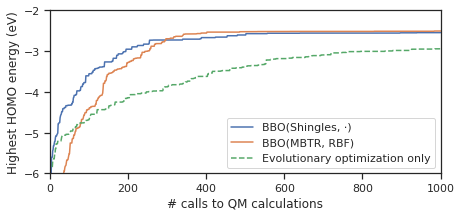

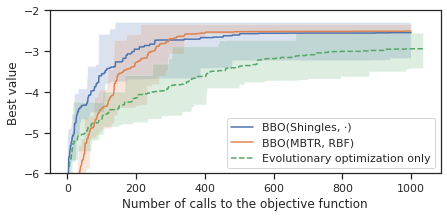

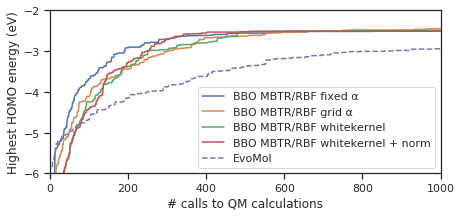

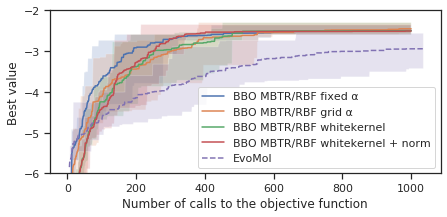

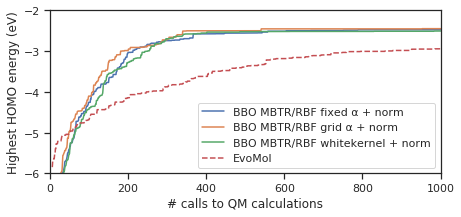

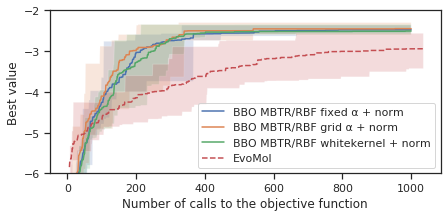

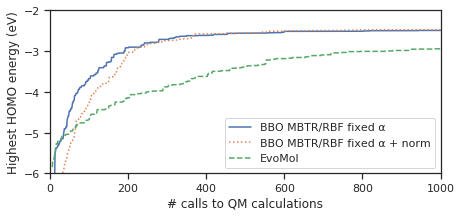

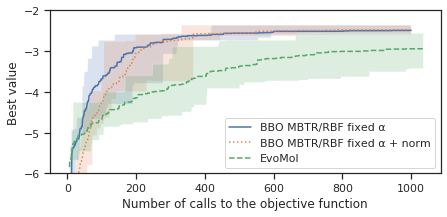

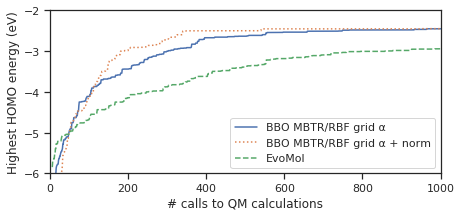

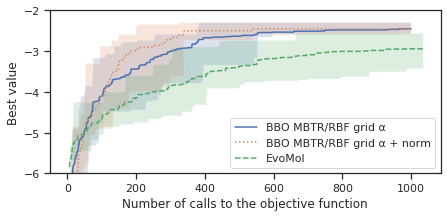

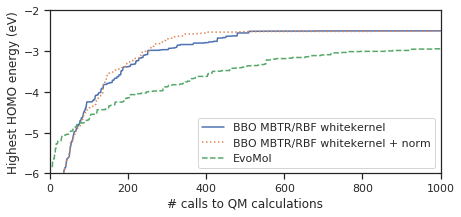

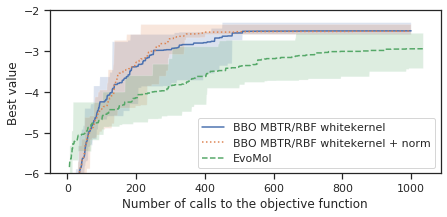

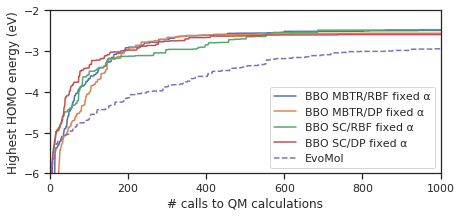

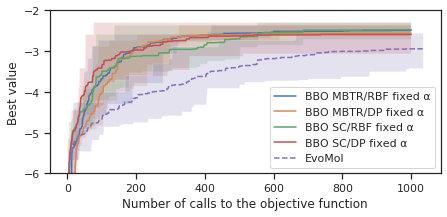

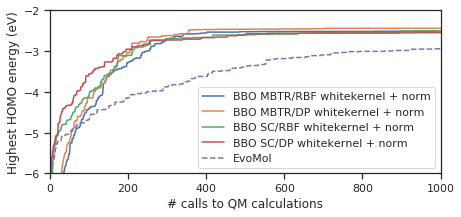

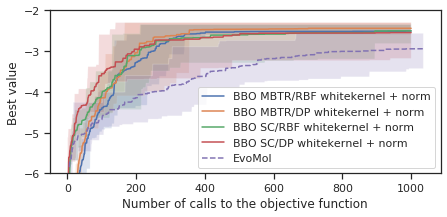

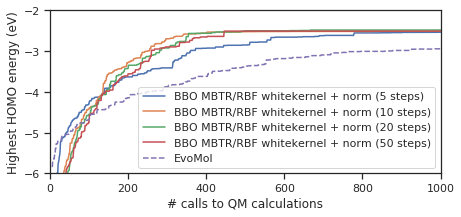

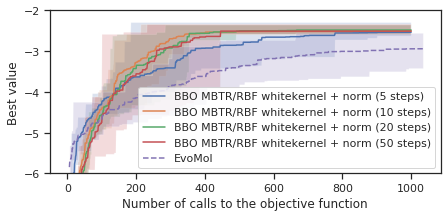

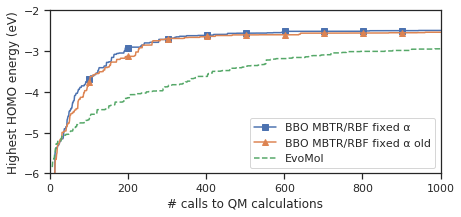

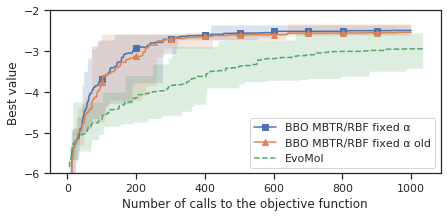

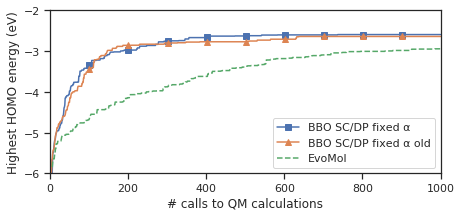

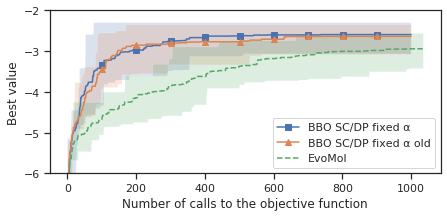

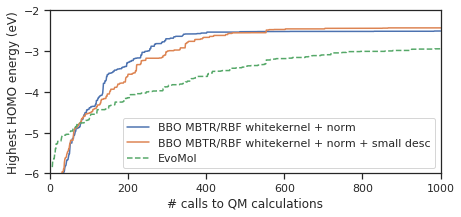

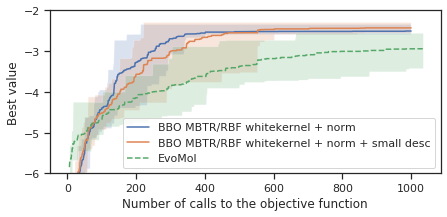

In [12]:
from bbomol.postprocessing import plot
plot.figsize = (7, 3)
from IPython.display import display, HTML


for g in groups:
    display(HTML("<h3>" + g[0] +"</h3>"))
    plot.plot_best_so_far(results_dict, metric="mean", exp_list_plot=g[1], plot_name=g[0], labels_dict=g[2],
                     classes_dashes=g[3], calasses_markers=g[4], ylim=(-6, -2), 
                     ylabel="Highest HOMO energy (eV)", xlabel="# calls to QM calculations", xlim=(0, 1000),
                     output_dir_path=output_figures_root)
    plot.plot_best_so_far(results_dict, metric="both", exp_list_plot=g[1], plot_name=g[0], labels_dict=g[2],
                     classes_dashes=g[3], classes_markers=g[4], ylim=(-6, -2))

# ECDF

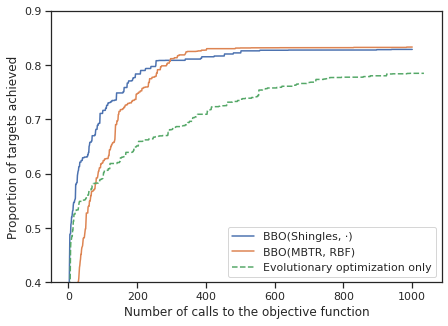

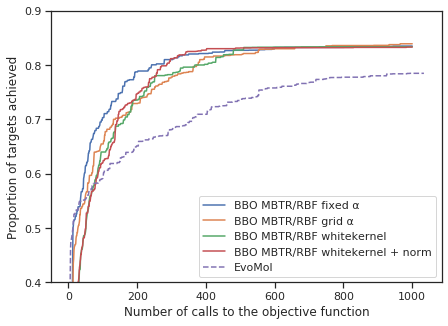

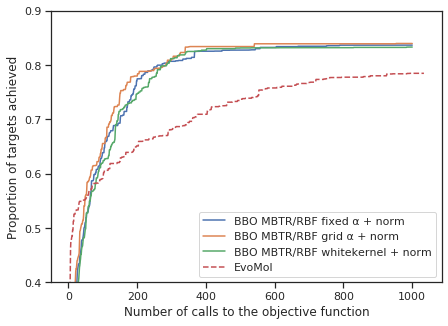

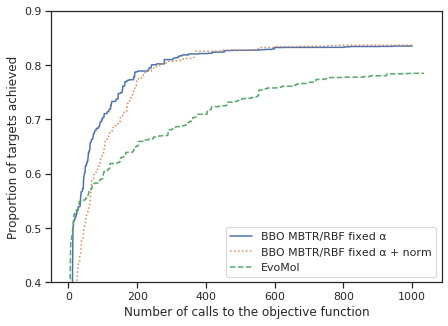

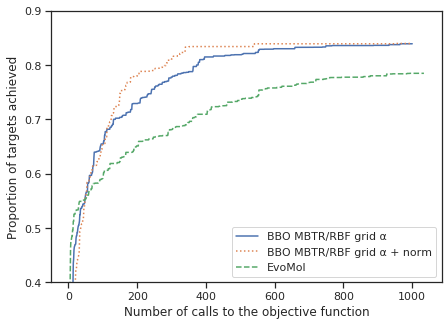

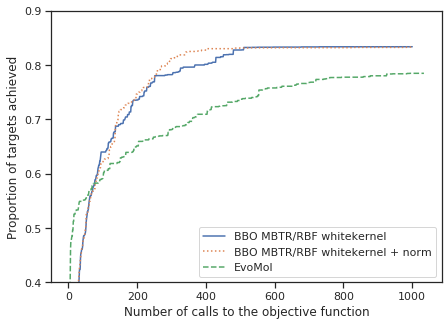

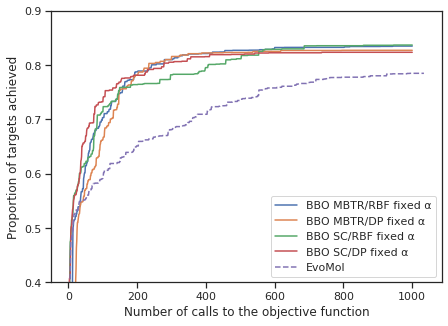

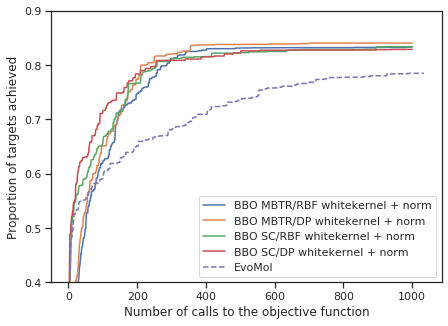

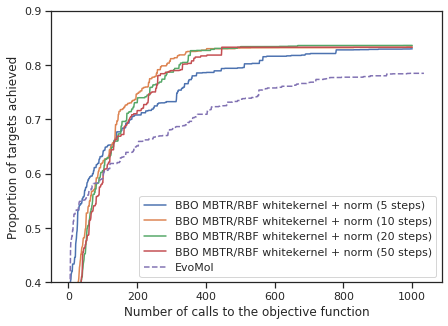

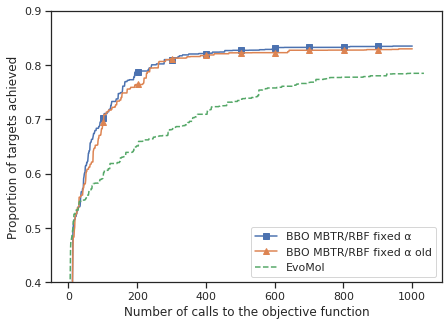

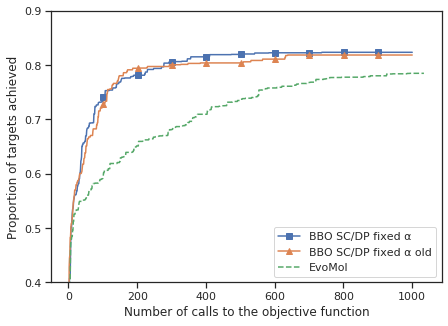

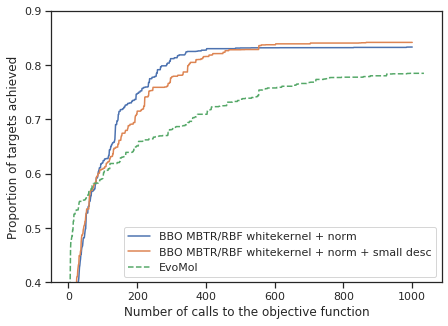

In [5]:
from bbomol.postprocessing.plot import plot_ecdf

for g in groups:
    display(HTML("<h3>" + g[0] +"</h3>"))
    plot_ecdf(results_dict, ecdf_targets=ECDF_TARGETS, exp_list_plot=g[1], plot_name=g[0], labels_dict=g[2],
              classes_dashes=g[3], classes_markers=g[4], ylim=(0.4, 0.9))


# ERT 

In [6]:
from bbomol.postprocessing.plot import display_ert

for g in groups:
    display(HTML("<h2>" + g[0] +"</h2>"))
    
    display(HTML("<h3>" + "DFT calls" +"</h3>"))
    display_ert(results_dict, ert_targets=ERT_TARGETS, xunit="calls", exp_list_plot=g[1], labels_dict=g[2])
    
    display(HTML("<h3>" + "Time" +"</h3>"))
    display_ert(results_dict, ert_targets=ERT_TARGETS, xunit="time", exp_list_plot=g[1], labels_dict=g[2])


Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0                BBO(Shingles, ⋅)      1     1     1     1     1     2     2   
1                  BBO(MBTR, RBF)      1     1     1     6     8    16    19   
2  Evolutionary optimization only      2     2     2     2     2     2     2   

   -6.5  -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  -1.5  
0     4     4     7    19    46    73   149   313  1068   inf   inf  
1    23    39    51    67   100   148   196   223  4300   inf   inf  
2     4     5    10    46   170   235   523  1186   inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0                BBO(Shingles, ⋅)   1600  1600  1600  1600  1600  1600  1600   
1                  BBO(MBTR, RBF)    460   460   460   540   880  1430  1870   
2  Evolutionary optimization only    110   110   130   130   130   130   130   

   -6.5  -6.0  -5.5  -5.0   -4.5   -4.0    -3.5    -3.0   -2.5  -2.0  -1.5  
0  1600  1600  2600  7790  21390  33600   66520  124386  4e+05   inf   inf  
1  2150  4160  6410  9750  18190  37860   51880   61500  2e+06   inf   inf  
2   160   240   380  2350  21090  33550  107710  267243    inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0             BBO MBTR/RBF fixed α      1     1     2     5     9    11    11   
1              BBO MBTR/RBF grid α      1     1     2     6    10    12    14   
2         BBO MBTR/RBF whitekernel      1     1     1     4     7    15    19   
3  BBO MBTR/RBF whitekernel + norm      1     1     1     6     8    16    19   
4                           EvoMol      2     2     2     2     2     2     2   

   -6.5  -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  -1.5  
0    12    14    17    31    61    83   145   165  1339   inf   inf  
1    15    23    28    47    70   123   201   278  1118   inf   inf  
2    26    38    50    64   102   139   241   262  2791   inf   inf  
3    23    39    51    67   100   148   196   223  4300   inf   inf  
4     4     5    10    46   170   235   523  1186   inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0             BBO MBTR/RBF fixed α    310   310   310   310   610   840   840   
1              BBO MBTR/RBF grid α    430   430   430   430   910  1100  1330   
2         BBO MBTR/RBF whitekernel    480   480   480   480   680  1160  1900   
3  BBO MBTR/RBF whitekernel + norm    460   460   460   540   880  1430  1870   
4                           EvoMol    110   110   130   130   130   130   130   

   -6.5  -6.0  -5.5  -5.0   -4.5   -4.0    -3.5    -3.0   -2.5  -2.0  -1.5  
0   840   890  1130  2660   8300  14010   27670   31700  5e+05   inf   inf  
1  1400  2000  2340  5570  11500  30040   47270   64620  4e+05   inf   inf  
2  2800  3900  5590  8420  22510  37060   75100   82690  1e+06   inf   inf  
3  2150  4160  6410  9750  18190  37860   51880   61500  2e+06   inf   inf  
4   160   240   380  2350  21090  33550  107710  267243    inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0      BBO MBTR/RBF fixed α + norm      1     1     2     5    10    13    17   
1       BBO MBTR/RBF grid α + norm      1     1     1     5    10    12    15   
2  BBO MBTR/RBF whitekernel + norm      1     1     1     6     8    16    19   
3                           EvoMol      2     2     2     2     2     2     2   

   -6.5  -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  -1.5  
0    20    35    49    65    86   114   185   209  1263   inf   inf  
1    21    31    37    48    91   114   154   188  1083   inf   inf  
2    23    39    51    67   100   148   196   223  4300   inf   inf  
3     4     5    10    46   170   235   523  1186   inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0      BBO MBTR/RBF fixed α + norm    440   440   440   440  1020  1300  1540   
1       BBO MBTR/RBF grid α + norm    410   410   410   410  1090  1190  1540   
2  BBO MBTR/RBF whitekernel + norm    460   460   460   540   880  1430  1870   
3                           EvoMol    110   110   130   130   130   130   130   

   -6.5  -6.0  -5.5  -5.0   -4.5   -4.0    -3.5    -3.0   -2.5  -2.0  -1.5  
0  1990  2960  5090  8550  13420  19230   33570   37960  5e+05   inf   inf  
1  2100  3570  4720  7000  15600  20370   26500   32620  4e+05   inf   inf  
2  2150  4160  6410  9750  18190  37860   51880   61500  2e+06   inf   inf  
3   160   240   380  2350  21090  33550  107710  267243    inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0         BBO MBTR/RBF fixed α      1     1     2     5     9    11    11   
1  BBO MBTR/RBF fixed α + norm      1     1     2     5    10    13    17   
2                       EvoMol      2     2     2     2     2     2     2   

   -6.5  -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  -1.5  
0    12    14    17    31    61    83   145   165  1339   inf   inf  
1    20    35    49    65    86   114   185   209  1263   inf   inf  
2     4     5    10    46   170   235   523  1186   inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0         BBO MBTR/RBF fixed α    310   310   310   310   610   840   840   
1  BBO MBTR/RBF fixed α + norm    440   440   440   440  1020  1300  1540   
2                       EvoMol    110   110   130   130   130   130   130   

   -6.5  -6.0  -5.5  -5.0   -4.5   -4.0    -3.5    -3.0   -2.5  -2.0  -1.5  
0   840   890  1130  2660   8300  14010   27670   31700  5e+05   inf   inf  
1  1990  2960  5090  8550  13420  19230   33570   37960  5e+05   inf   inf  
2   160   240   380  2350  21090  33550  107710  267243    inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0         BBO MBTR/RBF grid α      1     1     2     6    10    12    14   
1  BBO MBTR/RBF grid α + norm      1     1     1     5    10    12    15   
2                      EvoMol      2     2     2     2     2     2     2   

   -6.5  -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  -1.5  
0    15    23    28    47    70   123   201   278  1118   inf   inf  
1    21    31    37    48    91   114   154   188  1083   inf   inf  
2     4     5    10    46   170   235   523  1186   inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0         BBO MBTR/RBF grid α    430   430   430   430   910  1100  1330   
1  BBO MBTR/RBF grid α + norm    410   410   410   410  1090  1190  1540   
2                      EvoMol    110   110   130   130   130   130   130   

   -6.5  -6.0  -5.5  -5.0   -4.5   -4.0    -3.5    -3.0   -2.5  -2.0  -1.5  
0  1400  2000  2340  5570  11500  30040   47270   64620  4e+05   inf   inf  
1  2100  3570  4720  7000  15600  20370   26500   32620  4e+05   inf   inf  
2   160   240   380  2350  21090  33550  107710  267243    inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0         BBO MBTR/RBF whitekernel      1     1     1     4     7    15    19   
1  BBO MBTR/RBF whitekernel + norm      1     1     1     6     8    16    19   
2                           EvoMol      2     2     2     2     2     2     2   

   -6.5  -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  -1.5  
0    26    38    50    64   102   139   241   262  2791   inf   inf  
1    23    39    51    67   100   148   196   223  4300   inf   inf  
2     4     5    10    46   170   235   523  1186   inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0         BBO MBTR/RBF whitekernel    480   480   480   480   680  1160  1900   
1  BBO MBTR/RBF whitekernel + norm    460   460   460   540   880  1430  1870   
2                           EvoMol    110   110   130   130   130   130   130   

   -6.5  -6.0  -5.5  -5.0   -4.5   -4.0    -3.5    -3.0   -2.5  -2.0  -1.5  
0  2800  3900  5590  8420  22510  37060   75100   82690  1e+06   inf   inf  
1  2150  4160  6410  9750  18190  37860   51880   61500  2e+06   inf   inf  
2   160   240   380  2350  21090  33550  107710  267243    inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  -6.5  \
0  BBO MBTR/RBF fixed α      1     1     2     5     9    11    11    12   
1   BBO MBTR/DP fixed α      1     1     1     7    10    15    18    18   
2    BBO SC/RBF fixed α      1     1     1     1     2     3     3     4   
3     BBO SC/DP fixed α      1     1     1     1     1     2     2     3   
4                EvoMol      2     2     2     2     2     2     2     4   

   -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  -1.5  
0    14    17    31    61    83   145   165  1339   inf   inf  
1    24    26    41    80   105   144   180  9317   inf   inf  
2     4     7    20    50    86   135   312  1554   inf   inf  
3     7    10    20    41    58   127   280  4079   inf   inf  
4     5    10    46   170   235   523  1186   inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  -6.5  \
0  BBO MBTR/RBF fixed α    310   310   310   310   610   840   840   840   
1   BBO MBTR/DP fixed α    410   410   410   410   920  1260  1450  1450   
2    BBO SC/RBF fixed α   1570  1570  1570  1570  1570  1570  1570  1570   
3     BBO SC/DP fixed α   1610  1610  1610  1610  1610  1610  1610  1610   
4                EvoMol    110   110   130   130   130   130   130   160   

   -6.0  -5.5  -5.0   -4.5   -4.0    -3.5    -3.0   -2.5  -2.0  -1.5  
0   890  1130  2660   8300  14010   27670   31700  5e+05   inf   inf  
1  1720  1800  3180  11890  18940   27070   33720  3e+06   inf   inf  
2  1570  2480  5940  17970  32070   46530   87830  4e+05   inf   inf  
3  2260  3040  6570  16040  22330   41490   72342  8e+05   inf   inf  
4   240   380  2350  21090  33550  107710  267243    inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0  BBO MBTR/RBF whitekernel + norm      1     1     1     6     8    16    19   
1   BBO MBTR/DP whitekernel + norm      1     1     1     4     8    13    16   
2    BBO SC/RBF whitekernel + norm      1     1     1     1     2     3     4   
3     BBO SC/DP whitekernel + norm      1     1     1     1     1     2     2   
4                           EvoMol      2     2     2     2     2     2     2   

   -6.5  -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  -1.5  
0    23    39    51    67   100   148   196   223  4300   inf   inf  
1    17    31    40    54    88   126   184   203  1293   inf   inf  
2     5     5    14    27    74   115   157   273   901   inf   inf  
3     4     4     7    19    46    73   149   313  1068   inf   inf  
4     4     5    10    46   170   235   523  1186   inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0  BBO MBTR/RBF whitekernel + norm    460   460   460   540   880  1430  1870   
1   BBO MBTR/DP whitekernel + norm    430   430   430   430   720  1060  1220   
2    BBO SC/RBF whitekernel + norm   1510  1510  1510  1510  1510  1510  1510   
3     BBO SC/DP whitekernel + norm   1600  1600  1600  1600  1600  1600  1600   
4                           EvoMol    110   110   130   130   130   130   130   

   -6.5  -6.0  -5.5  -5.0   -4.5   -4.0    -3.5    -3.0   -2.5  -2.0  -1.5  
0  2150  4160  6410  9750  18190  37860   51880   61500  2e+06   inf   inf  
1  1290  2430  3600  6030  18230  33360   53980   60870  6e+05   inf   inf  
2  1510  1510  3360  9000  28710  45460   62050   98000  3e+05   inf   inf  
3  1600  1600  2600  7790  21390  33600   66520  124386  4e+05   inf   inf  
4   160   240   380  2350  21090  33550  107710  267243    inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  \
0   BBO MBTR/RBF whitekernel + norm (5 steps)      1     1     1     2     2   
1  BBO MBTR/RBF whitekernel + norm (10 steps)      1     1     1     6     8   
2  BBO MBTR/RBF whitekernel + norm (20 steps)      1     1     2     6    10   
3  BBO MBTR/RBF whitekernel + norm (50 steps)      1     1     1     7    13   
4                                      EvoMol      2     2     2     2     2   

   -7.5  -7.0  -6.5  -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  \
0     3     4     4    20    28    39    86   156   279   415  4302   inf   
1    16    19    23    39    51    67   100   148   196   223  4300   inf   
2    22    26    36    47    58    78   116   185   221   238  1411   inf   
3    21    29    37    44    67    85   141   199   218   246  2629   inf   
4     2     2     4     5    10    46   170   235   523  1186   inf   inf   

   -1.5  
0   inf  
1   inf  
2   inf  
3   inf  
4   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  \
0   BBO MBTR/RBF whitekernel + norm (5 steps)    180   180   180   180   180   
1  BBO MBTR/RBF whitekernel + norm (10 steps)    460   460   460   540   880   
2  BBO MBTR/RBF whitekernel + norm (20 steps)    570   570   570   810  1090   
3  BBO MBTR/RBF whitekernel + norm (50 steps)   1100  1100  1100  1510  2480   
4                                      EvoMol    110   110   130   130   130   

   -7.5  -7.0  -6.5   -6.0   -5.5   -5.0   -4.5   -4.0    -3.5    -3.0   -2.5  \
0   180   180   180    960   1360   2890  16610  42210   79990  126910  1e+06   
1  1430  1870  2150   4160   6410   9750  18190  37860   51880   61500  2e+06   
2  2530  3010  4480   5980   8040  12710  29550  63550   75830   80430  7e+05   
3  3820  6050  8420  10000  17620  25810  53590  86020   94360  106090  1e+06   
4   130   130   160    240    380   2350  21090  33550  107710  267243    inf   

   -2.0  -1.5  
0   inf   inf  
1   inf   inf  
2   inf   inf  
3   inf   inf  
4   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  -6.5  \
0      BBO MBTR/RBF fixed α      1     1     2     5     9    11    11    12   
1  BBO MBTR/RBF fixed α old      1     1     1     4     9    12    12    12   
2                    EvoMol      2     2     2     2     2     2     2     4   

   -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  -1.5  
0    14    17    31    61    83   145   165  1339   inf   inf  
1    13    17    32    68   108   166   177  3151   inf   inf  
2     5    10    46   170   235   523  1186   inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  -6.5  \
0      BBO MBTR/RBF fixed α    310   310   310   310   610   840   840   840   
1  BBO MBTR/RBF fixed α old    380   380   380   380   670   870   870   870   
2                    EvoMol    110   110   130   130   130   130   130   160   

   -6.0  -5.5  -5.0   -4.5   -4.0    -3.5    -3.0   -2.5  -2.0  -1.5  
0   890  1130  2660   8300  14010   27670   31700  5e+05   inf   inf  
1   930  1130  3820  13680  25220   37960   40590  1e+06   inf   inf  
2   240   380  2350  21090  33550  107710  267243    inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  -6.5  \
0      BBO SC/DP fixed α      1     1     1     1     1     2     2     3   
1  BBO SC/DP fixed α old      1     1     1     1     2     2     2     2   
2                 EvoMol      2     2     2     2     2     2     2     4   

   -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  -2.0  -1.5  
0     7    10    20    41    58   127   280  4079   inf   inf  
1     3     6    18    47    64   132   377  1822   inf   inf  
2     5    10    46   170   235   523  1186   inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  -6.5  \
0      BBO SC/DP fixed α   1610  1610  1610  1610  1610  1610  1610  1610   
1  BBO SC/DP fixed α old   1850  1850  1850  1850  1850  1850  1850  1850   
2                 EvoMol    110   110   130   130   130   130   130   160   

   -6.0  -5.5  -5.0   -4.5   -4.0    -3.5    -3.0   -2.5  -2.0  -1.5  
0  2260  3040  6570  16040  22330   41490   72342  8e+05   inf   inf  
1  1850  2750  6860  22020  27560   49170  100288  4e+05   inf   inf  
2   240   380  2350  21090  33550  107710  267243    inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  \
0               BBO MBTR/RBF whitekernel + norm      1     1     1     6   
1  BBO MBTR/RBF whitekernel + norm + small desc      1     1     1     7   
2                                        EvoMol      2     2     2     2   

   -8.0  -7.5  -7.0  -6.5  -6.0  -5.5  -5.0  -4.5  -4.0  -3.5  -3.0  -2.5  \
0     8    16    19    23    39    51    67   100   148   196   223  4300   
1    10    14    17    20    35    46    66   110   180   271   284  1096   
2     2     2     2     4     5    10    46   170   235   523  1186   inf   

   -2.0  -1.5  
0   inf   inf  
1   inf   inf  
2   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  \
0               BBO MBTR/RBF whitekernel + norm    460   460   460   540   
1  BBO MBTR/RBF whitekernel + norm + small desc    300   300   300   370   
2                                        EvoMol    110   110   130   130   

   -8.0  -7.5  -7.0  -6.5  -6.0  -5.5  -5.0   -4.5   -4.0    -3.5    -3.0  \
0   880  1430  1870  2150  4160  6410  9750  18190  37860   51880   61500   
1   680  1120  1320  1500  3190  4450  9750  26070  58590   94680   97930   
2   130   130   130   160   240   380  2350  21090  33550  107710  267243   

    -2.5  -2.0  -1.5  
0  2e+06   inf   inf  
1  4e+05   inf   inf  
2    inf   inf   inf

## Stable dynamics 

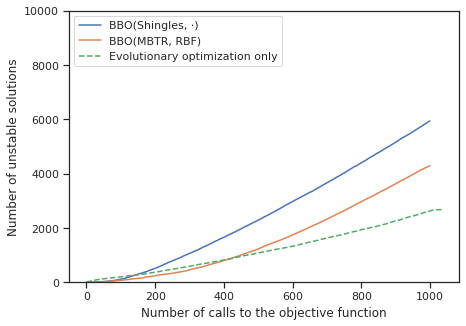

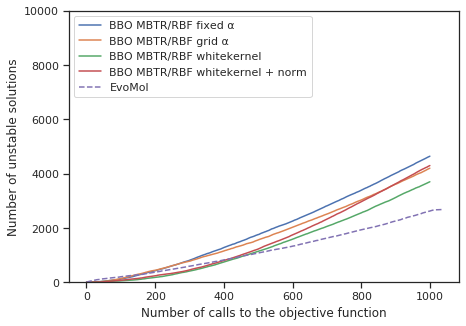

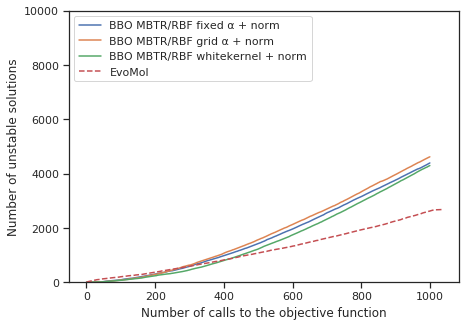

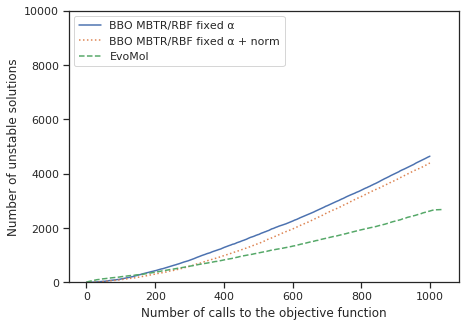

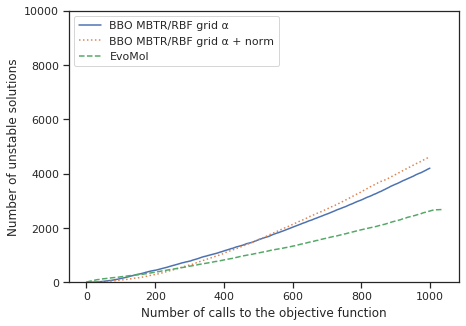

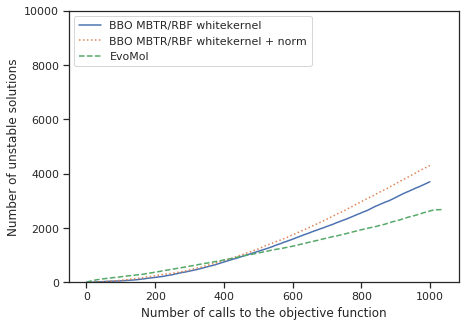

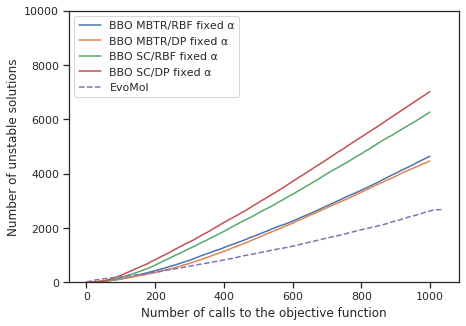

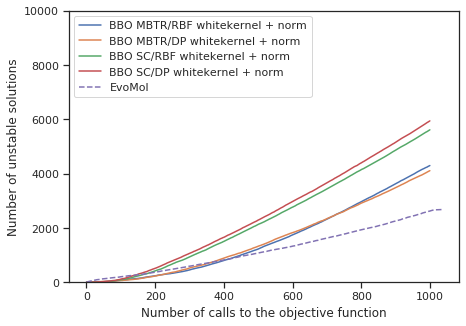

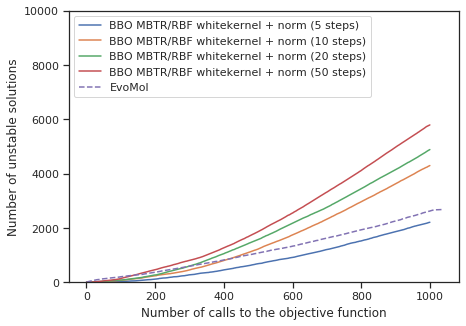

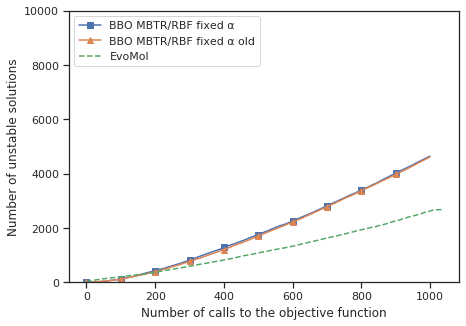

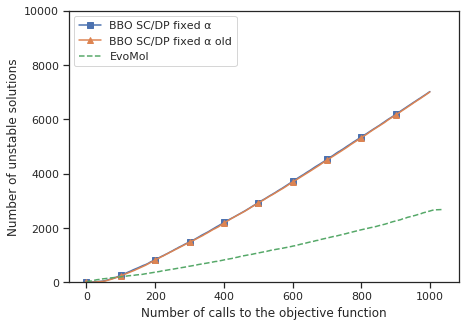

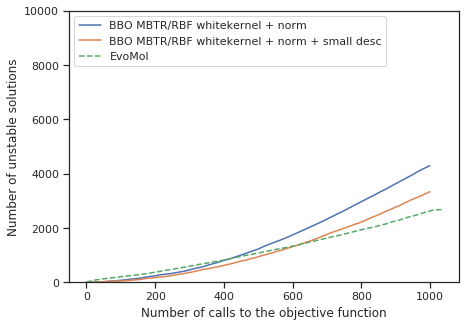

In [7]:
from bbomol.postprocessing.plot import plot_stable_dynamics
from IPython.display import display, HTML

for g in groups:
    display(HTML("<h3>" + g[0] +"</h3>"))
    plot_stable_dynamics(results_dict=results_dict, exp_list_plot=g[1], plot_name=g[0], labels_dict=g[2],
                         classes_dashes=g[3], classes_markers=g[4], ylim=(0, 10000))
